# Most Popular Topics in Data Science - Part 2

In the first part of this project, I selected questions posted in 2020 to ensure my rankings were based on the most recent data. However, due to the malleable nature of the field, it is important to realize that the most popular data science topics today might be irrelevant in the next few years. Since studying subfields that will soon become irrelevant will not serve students long-term, determining which data science topics are likely to remain relevant in the next five years is important.

I hypothesize that subfields that have remained relevant for the past seven years are highly likely to remain so in the next five years, while subfields that have only become relevant in the last few years are less likely to remain so. I am using the seven-year time frame because the Data Science Stack Exchange was created in 2014.

## 1. Selecting and Preparing the Data for Analysis

In order to determine which data science topics are likely to remain popular, I will first select a new dataset containing data entries from 2014 to 2020. Here is the SQL query I used to extract this data.

<img src="Photos/SQL Query 3.png">

Next, I will import the appropriate libraries, read the dataset, and display the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

new_questions = pd.read_csv("Datasets/questions_2014_2020.csv")
new_questions

,Id,Score,ViewCount,Tags,AnswerCount,Year
0,893,93,255202,<r><statistics><correlation>,1,2014
1,11928,74,252616,<python><random-forest><pandas>,9,2016
2,12321,191,247536,<python><scikit-learn>,9,2016
3,13490,197,244280,<classification><keras><weighted-data>,8,2016
4,33053,36,226355,<pandas><dataframe>,5,2018
...,...,...,...,...,...,...
12365,63366,1,101,<statistics><preprocessing><naive-bayes-classi...,1,2019
12366,84889,2,101,<machine-learning><classification><xgboost><mu...,1,2020
12367,42970,2,101,<machine-learning><reinforcement-learning><q-l...,1,2018
12368,74210,1,101,<tfidf><search-engine>,1,2020


Like in part 1, note that the "Tags" column lists all data science subfields that are relevant to each question. I will be using this column in order to determine the total number of questions that involve each topic as well as the total number of views that questions involving each topic receive.

I will create two dictionaries, one for each metric. Unlike part 1, I will divvy up all values by year. For example, the value for "machine-learning" in the first dictionary will be a list of the number of questoins from 2014, 2015, 2016, etc. that contain the tag "machine-learning".

In [2]:
count_tag_years = {}
views_tag_years = {}
count = 0

for row in new_questions["Tags"]:
    tags = row.replace("><", " ").replace("<", "").replace(">", "").split(" ")
    for tag in tags:
        year = new_questions["Year"][count]
        y_index = year - 2014
        if tag in count_tag_years:
            count_tag_years[tag][y_index] += 1
            count_tag_years[tag][7] += 1
            
            views_tag_years[tag][y_index] += new_questions["ViewCount"].iloc[count]
            views_tag_years[tag][7] += new_questions["ViewCount"].iloc[count]
        else:
            count_tag_years[tag] = [0,0,0,0,0,0,0,0]
            count_tag_years[tag][y_index] = 1
            count_tag_years[tag][7] = 1
            
            views_tag_years[tag] = [0,0,0,0,0,0,0,0]
            views_tag_years[tag][y_index] = new_questions["ViewCount"].iloc[count]
            views_tag_years[tag][7] = new_questions["ViewCount"].iloc[count]
    count += 1

Next I will convert each dictionary into a pandas dataframe, create the appropriate column names, and sort the values.

In [3]:
tags_years = pd.DataFrame.from_dict(count_tag_years, orient="index")
tags_years.columns = ["2014", "2015","2016", "2017", "2018", "2019", "2020", "Total"]
tag_count_years = tags_years.sort_values(by="Total", ascending=False)

views_years = pd.DataFrame.from_dict(views_tag_years, orient="index")
views_years.columns = ["2014", "2015","2016", "2017", "2018", "2019", "2020", "Total"]
tag_views_years = views_years.sort_values(by="Total", ascending=False)

In [4]:
tag_count_years[:10]

,2014,2015,2016,2017,2018,2019,2020,Total
machine-learning,158,338,540,763,1174,915,281,4169
python,40,114,273,389,770,774,215,2575
neural-network,22,78,228,359,578,348,80,1693
deep-learning,8,21,127,329,596,430,117,1628
classification,67,119,160,200,295,225,71,1137
keras,0,2,53,142,385,383,100,1065
scikit-learn,13,43,133,151,288,255,95,978
nlp,37,47,99,135,168,175,66,727
tensorflow,0,4,56,134,225,221,77,717
r,49,122,174,148,111,74,16,694


In [5]:
tag_views_years[:10]

,2014,2015,2016,2017,2018,2019,2020,Total
python,549943,885319,2635188,2406215,4249642,1494349,132459,12353115
machine-learning,1150856,1424705,2195021,2788674,3151561,932749,115268,11758834
neural-network,301476,578934,1424539,1383579,1478952,454447,34693,5656620
deep-learning,165829,160749,1192735,1617468,1532753,549038,50204,5268776
pandas,24498,143324,1138919,907776,2065511,704587,57865,5042480
scikit-learn,224318,433982,1001306,1050773,1117436,357511,46686,4232012
keras,0,10853,901671,773211,1480142,637310,81687,3884874
classification,309943,348706,634879,428444,574974,257026,29141,2583113
r,488046,757433,606765,368476,226254,82852,23635,2553461
tensorflow,0,176747,428934,641393,577029,305076,51449,2180628


It seems as though the most relevant data science topics listed on the two tables above are not much different from the ones calculated in part 1. However, note that these data science topics are sorted by total for all years, rather than for individual years. Therefore, it is possible that the most popular topics of today have become so recently, and that since the DSSE has increased its usership over the past few years, total relevancy is heavly biased towards relevancy in the present.

## 2. Ranking the Most Popular Data Science Topics by Year

My plan is to develop a ranking system that ranks all the data science subfields' relevancy for each year. For example, if the machine-learning tag were used on the most questions in 2019 and the second most questions in 2020, it's 2019 and 2020 ranks would be 1 and 2 respectively. For simplicities sake, I will only select the tag names of the top ten topics from 2014 and the top ten topics from 2020 (there will be crossover), and then calculate the ranks of these topics for every year from 2014 to 2020.

First, I will need to determine the top 10 most relevant data science topics in 2014 and 2020 for both my relevancy metrics (total questions and total views).

In [6]:
count_start_tags = list(tag_count_years.sort_values(by="2014", ascending=False).index)
count_end_tags = list(tag_count_years.sort_values(by="2020", ascending=False).index)

views_start_tags = list(tag_views_years.sort_values(by="2014", ascending=False).index)
views_end_tags = list(tag_views_years.sort_values(by="2020", ascending=False).index)

Next, I will combine these two lists into a single list.

In [7]:
combo_count_tags = count_start_tags[:10]
combo_count_tags.extend(x for x in count_end_tags[:10] if x not in combo_count_tags)

combo_views_tags = views_start_tags[:10]
combo_views_tags.extend(x for x in views_end_tags[:10] if x not in combo_views_tags)

Now that I know which data science topics I will be examining, I will create a for loop for both metrics that calculates the rank for each topic in the list from 2014 to 2020.

In [8]:
count_ranks_dict = {}
count_ranks = []

for tag in combo_count_tags:
    tag_years = []
    for year in ["2014", "2015", "2016","2017","2018","2019","2020"]:
        year_rank = list(tag_count_years.sort_values(by=year, ascending=False).index).index(tag) + 1
        tag_years.append(year_rank)
    count_ranks.append(tag_years)
    count_ranks_dict[tag] = tag_years
    
views_ranks_dict = {}
views_ranks = []

for tag in combo_views_tags:
    tag_years = []
    for year in ["2014", "2015", "2016","2017","2018","2019","2020"]:
        year_rank = list(tag_views_years.sort_values(by=year, ascending=False).index).index(tag) + 1
        tag_years.append(year_rank)
    views_ranks.append(tag_years)
    views_ranks_dict[tag] = tag_years

In [9]:
new_count_ranks = pd.DataFrame.from_dict(count_ranks_dict, orient="index")
new_views_ranks = pd.DataFrame.from_dict(views_ranks_dict, orient="index")

new_count_ranks.columns = ["2014", "2015", "2016", "2017", "2018", "2019", "2020"]
new_views_ranks.columns = ["2014", "2015", "2016", "2017", "2018", "2019", "2020"]

In [10]:
new_count_ranks

,2014,2015,2016,2017,2018,2019,2020
machine-learning,1,1,1,1,1,1,1
classification,2,3,5,5,6,7,8
data-mining,3,5,9,11,19,26,27
bigdata,4,9,22,44,76,91,211
r,5,2,4,7,16,20,41
python,6,4,2,2,2,2,2
nlp,7,11,11,9,10,11,9
dataset,8,8,13,14,18,15,20
clustering,9,7,10,12,14,17,23
text-mining,10,14,14,18,33,79,90


In [11]:
new_views_ranks

,2014,2015,2016,2017,2018,2019,2020
machine-learning,1,1,2,1,2,2,2
python,2,2,1,2,1,1,1
r,3,3,9,12,26,25,12
data-mining,4,6,26,21,32,21,31
clustering,5,13,29,13,34,27,46
statistics,6,29,10,53,41,69,20
classification,7,9,8,10,10,10,10
k-means,8,41,54,33,52,57,94
neural-network,9,4,3,4,6,6,8
correlation,10,83,63,64,149,73,70


## 3. Preparing the Ranks for Graphing

Because I plan on eventually graphing these rankings, I will need to solve the following two problems:
- The difference between rankings is too vast in some instances, which will make it extremely difficult to graph. The range of possible values for both metrics is greater than 400. I believe I will be able to graph around 50 rankings while maintaining graph readability, so I will need to find a way to exclude graphing all rankings under 50.
- When graphing, the largest values appear on top, meaning that the highest ranks (1, 2, 3) would appear at the bottom of the graph. I will need to find a way to reverse the order.

I can partially fix both problems by subtracting each ranking by the number 51. This way, the top ranked value will have a value of 50 and the 50th ranked value will have a value of 1. Every other value will have a rank of zero or less.

In [12]:
for x in count_ranks:
    for n, y in enumerate(x):
        x[n] = 51 - y
        
for x in views_ranks:
    for n, y in enumerate(x):
        x[n] = 51 - y

### a) Steps Taken to Prepare the Ranks for Graphing

While that process helped ensure that the highest ranked values appear at the top of the graph, I will still need to find a way to get rid of all values that are less than 1 (a value of 1 will be the 50th rank). I will also need to make a few changes in order to make the graphs more aesthetic. Since this process will be extremely complex, I will list all of the steps I will take (and why I'm taking them) below.
1. Create two lists of lists (one for each metrics) that matches each value in count_ranks and views_ranks with the year in which the value was aggregated. This will make more sense in future steps.
2. Create a function (the organizer function) that edits all values in count_ranks and views_ranks that are less than 1 (not ranked in 1-50).
    - Case 1: Preceeding value and succeeding value are both less than 1 or a NaN value
        - Current Value = change to a NaN (won't be graphed)
        - Year = keep the same (year value will be ignored since the current value won't be graphed)
    - Case 2: Preceeding value is less than 1 or a NaN value, succeeding value is greater than 1
        - Current Value = change to 0 so a line will extend to the bottom of the graph
        - Year = change year value so that the line will be at the same slope it would be if it where extended to the value that is less than 1 (even though it will stop at 0). This process is completed by the forward function and will make it appear as though the line is extending beyond the graph to a much lower value.
    - Case 3: Preceeding value is greater than 1, succeeding value is less than 1 or a NaN value
        - Current Value = change to 0 so a line will extend to the bottom of the graph
        - Year = change year value so that the line will be at the same slope it would be if it where extended to the value that is less than 1 (even though it will stop at 0). This process is completed by the backwards function and will make it appear as though the line is extending beyond the graph to a much lower value.
    - Case 4: Preceeding value and succeeding value are both greater than 1
        - Current Value = change to 0 so the line will be at the bottom of the graph
        - Year = keep the same (will appear as though the line "bounces" off the zero line)
3. Create a line chart for each metric using the newly edited count_ranks, count_years, views_ranks, and views_years values.
4. On the line chart, manually create text labels for each tag names to improve legibility.

Now that I have explained the method in which I will create the graphs, I will continue with code until the graphs are created.

In [13]:
count_years = []
views_years = []

for y in range(len(count_ranks)):
    count_years.append([*range(2014,2021)])
    views_years.append([*range(2014,2021)])

In [14]:
def forward(years, y, n1, n2):
    num = float(y[n2+1] - 1)
    denom = float(y[n2+1] - y[n2])
    years[n1][n2] = round(years[n1][n2+1] - (num / denom), 2)
    y[n2] = 0

In [15]:
def backward(years, y, n1, n2):
    num = float(y[n2-1] - 1)
    denom = float(y[n2] - y[n2-1])
    years[n1][n2] = round(years[n1][n2-1] - (num / denom), 2)
    y[n2] = 0

In [16]:
def organizer(ranks, years):
    for n1, y in enumerate(ranks):
        for n2, x in enumerate(y):
            if (x < 1):
                if n2 == 0:
                    if y[n2+1] < 1 or np.isnan(y[n2+1]):
                        y[n2] = np.nan
                    else:
                        forward(years, y, n1, n2)
                elif n2 == 6:
                    if y[n2-1] < 1 or np.isnan(y[n2-1]):
                        y[n2] = np.nan
                    else:
                        backward(years, y, n1, n2)
                else:
                    if y[n2-1] < 1 or np.isnan(y[n2-1]):
                        if y[n2+1] < 1 or np.isnan(y[n2+1]):
                            y[n2] = np.nan
                        else:
                            forward(years, y, n1, n2)
                    else:
                        if y[n2+1] < 1 or np.isnan(y[n2+1]):
                            backward(years, y, n1, n2)
                        else:
                            y[n2] = 0 

In [17]:
organizer(count_ranks, count_years)
organizer(views_ranks, views_years)

### b) Rank of Tags with Most Questions (2014-2020)

[]

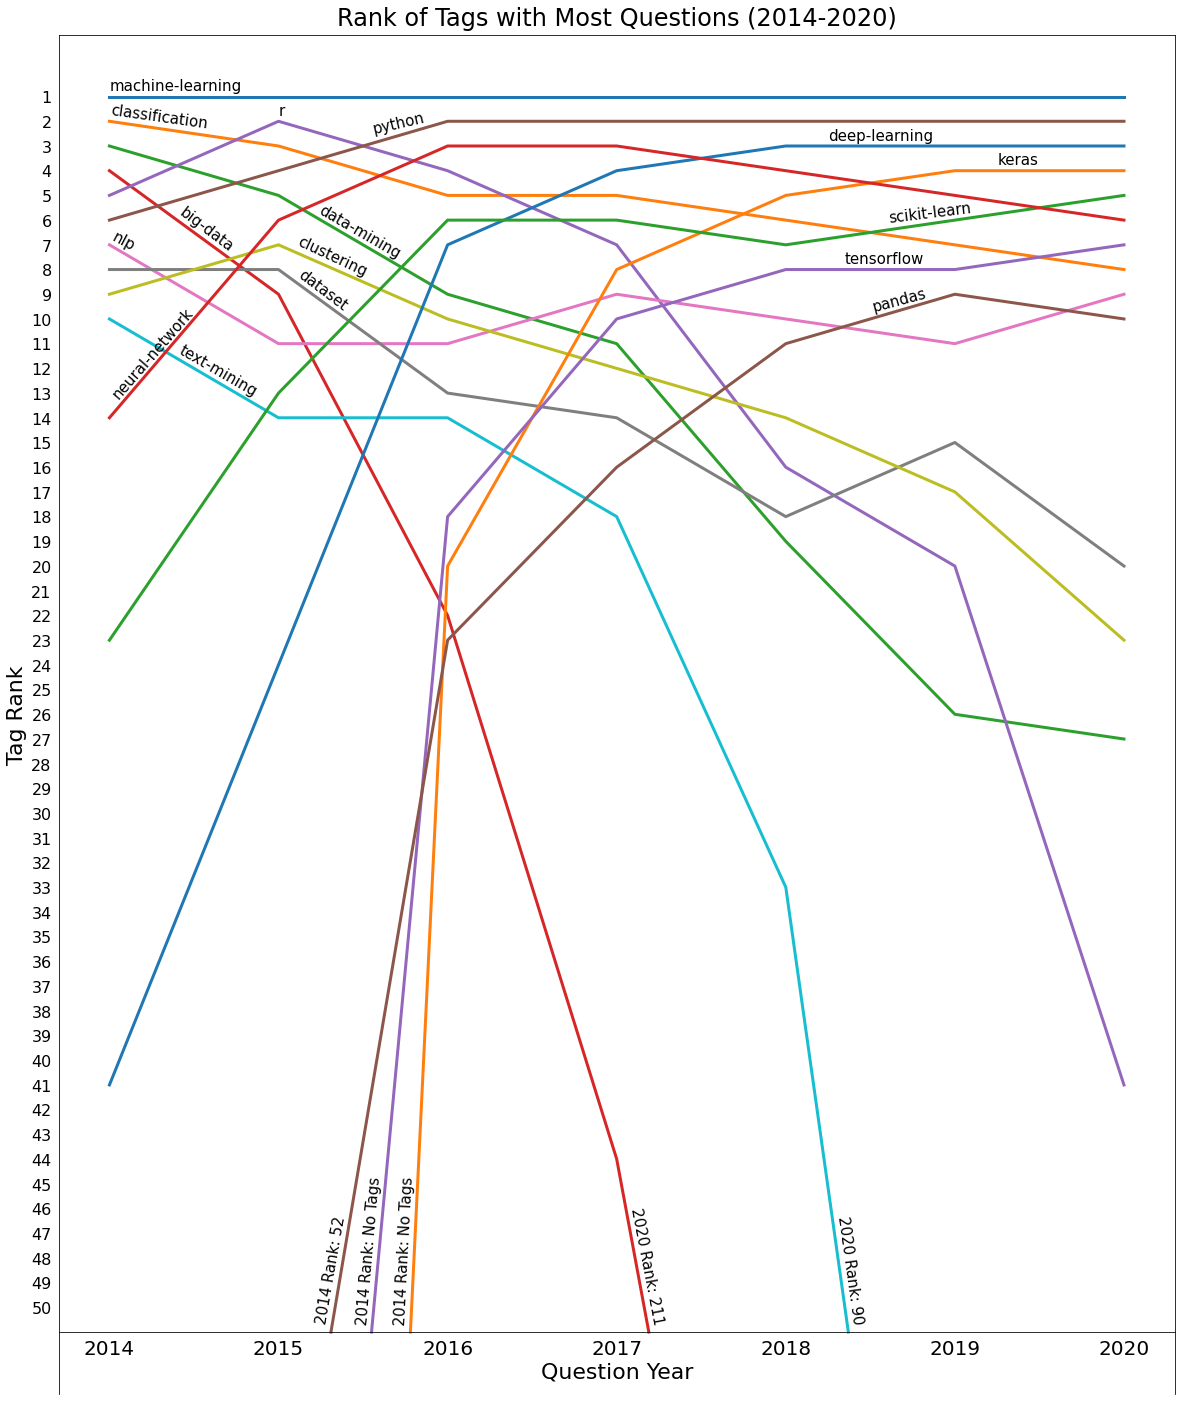

In [18]:
fig, ax = plt.subplots(figsize=(20, 25))

ax.set_xticks([*range(2014,2021)])
ax.set_yticks([*range(1, 51)])

for x in range(len(count_ranks)):
    ax.plot(count_years[x], count_ranks[x], lw=3)
    
ax.spines["bottom"].set_position('zero')

ax.set_xlabel("Question Year", fontsize=22)
ax.set_ylabel("Tag Rank", fontsize=22)
    
ax.set_yticklabels([str(i) for i in range(50,0,-1)], fontsize=16)
ax.set_xticklabels(["2014", "2015", "2016", "2017", "2018", "2019", "2020"], fontsize=20)

ax.set_title("Rank of Tags with Most Questions (2014-2020)", fontsize=24, y=1.0025)

ax.text(2014, 50.25, "machine-learning", fontsize=15)
ax.text(2014, 48.75, "classification", fontsize=15, rotation=352)
ax.text(2015.22, 43.45, "data-mining", fontsize=15, rotation=330)
ax.text(2014.4, 43.75, "big-data", fontsize=15, rotation=323)
ax.text(2015, 49.25, "r", fontsize=15)
ax.text(2015.55, 48.5, "python", fontsize=15, rotation=13)
ax.text(2014, 43.8, "nlp", fontsize=15, rotation=332)
ax.text(2015.1, 41.35, "dataset", fontsize=15, rotation=323)
ax.text(2015.1, 42.75, "clustering", fontsize=15, rotation=335)
ax.text(2014.4, 37.9, "text-mining", fontsize=15, rotation=330)
ax.text(2018.25, 48.25, "deep-learning", fontsize=15)
ax.text(2019.25, 47.25, "keras", fontsize=15)
ax.text(2018.6, 44.9, "scikit-learn", fontsize=15, rotation=7)
ax.text(2014, 37.78, "neural-network", fontsize=15, rotation=49)
ax.text(2018.5, 41.3, "pandas", fontsize=15, rotation=15)
ax.text(2018.35, 43.25, "tensorflow", fontsize=15)

ax.text(2015.21, 0.4, "2014 Rank: 52", rotation=80, fontsize=15)
ax.text(2015.45, 0.4, "2014 Rank: No Tags", rotation=85, fontsize=15)
ax.text(2015.68, 0.4, "2014 Rank: No Tags", rotation=87, fontsize=15)
ax.text(2017.07, 0.4, "2020 Rank: 211", rotation=281, fontsize=15)
ax.text(2018.29, 0.4, "2020 Rank: 90", rotation=278, fontsize=15)

ax.tick_params(axis="both", which="both", top=False, bottom=False, left=False)

plt.plot()


The data science topics that are most likely to be relevant in five years time are those that currently are ranked within the top ten and were ranked in the top 30 in 2014. Therefore, based off number of questions, the data science topics that are most likely to remain relevant in 2025 are:
1. machine-learning
2. python
3. classification
4. neural-network
5. scikit-learn
6. nlp

Some of the other values currently in the top ten (deep-learning, keras, pandas, and tensorflow) could also remain relevant in 2025, but considering they haven't been relevant for long periods of time, it's difficult to gauge their longevity.

The two most prominent programming languages for data science are python and R. Based on this graph, it seem as though R was slightly more prominent than python in 2014 and 2015 but was quickly overtaken by python in terms of popularity. Today, python is the 2nd most prominent data science topic on DSSE while R is only the 41st most promient, indicating that R has become less widely used over time. Therefore, data scientist students should definitely learn python before learning R.

### c) Rank of Tags with Most Views (2014-2020)

[]

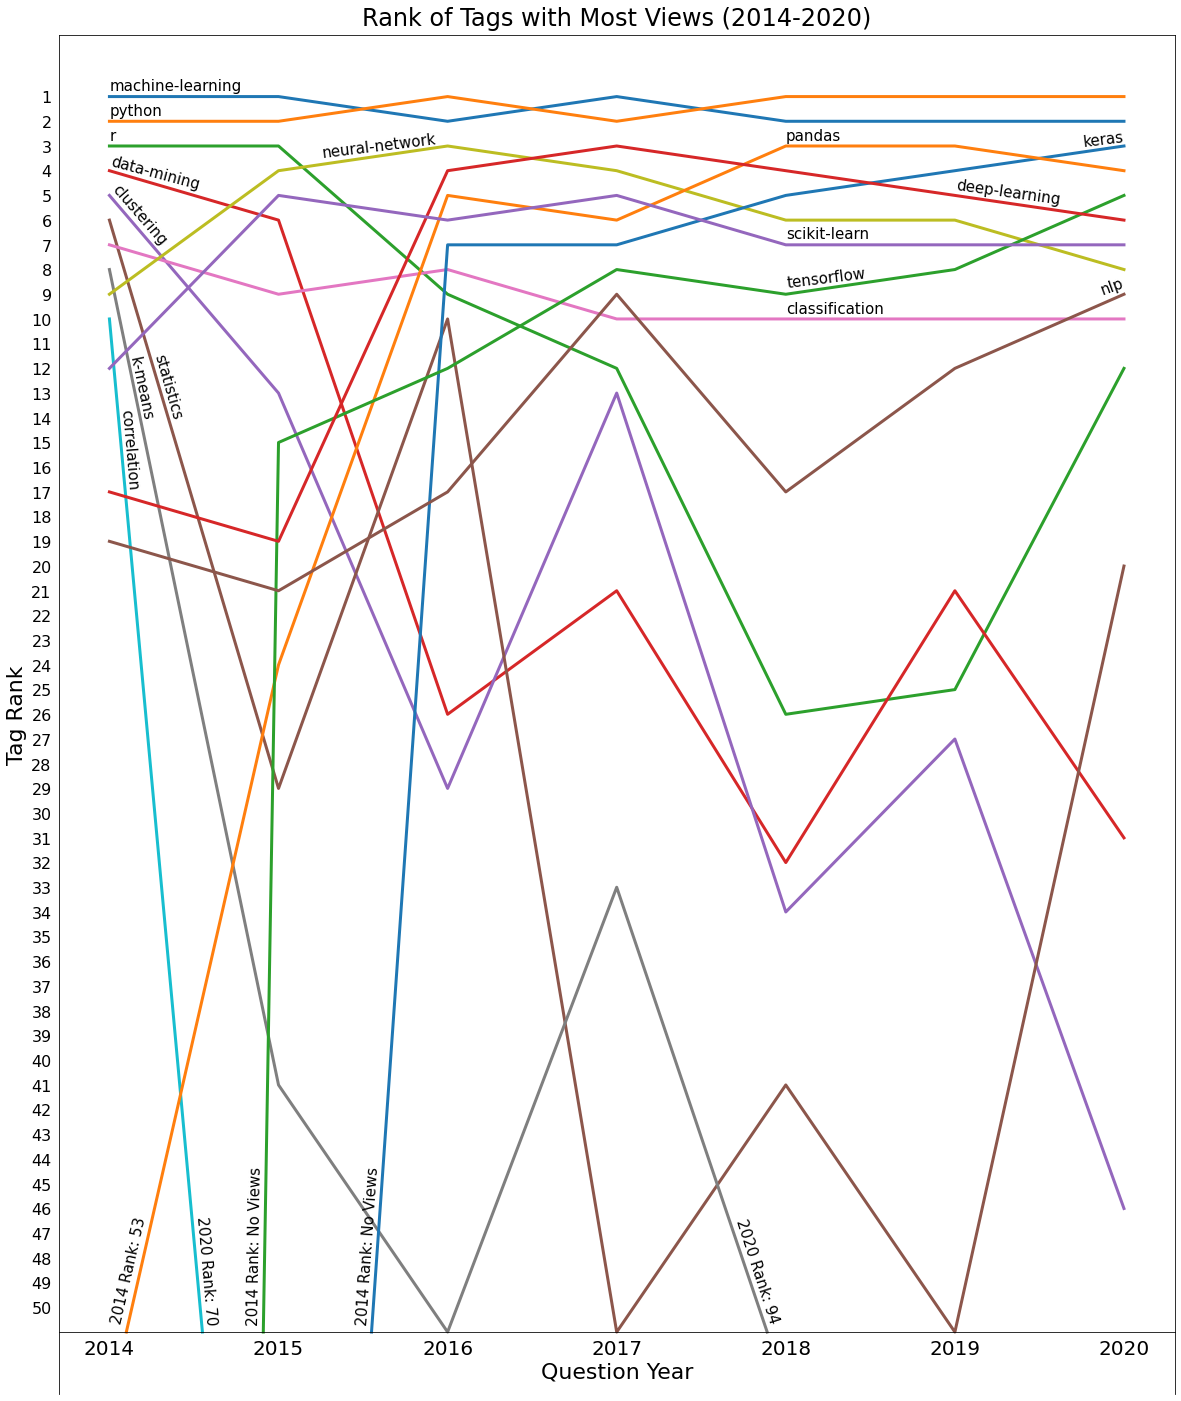

In [19]:
fig, ax = plt.subplots(figsize=(20, 25))

ax.set_xticks([*range(2014,2021)])
ax.set_yticks([*range(1, 51)])

for x in range(len(views_ranks)):
    ax.plot(views_years[x], views_ranks[x], lw=3)

ax.spines["bottom"].set_position('zero')
    
ax.set_xlabel("Question Year", fontsize=22)
ax.set_ylabel("Tag Rank", fontsize=22)
    
ax.set_yticklabels([str(i) for i in range(50,0,-1)], fontsize=16)
ax.set_xticklabels(["2014", "2015", "2016", "2017", "2018", "2019", "2020"], fontsize=20)

ax.set_title("Rank of Tags with Most Views (2014-2020)", fontsize=24, y=1.0025)

ax.text(2014, 50.25, "machine-learning", fontsize=15)
ax.text(2014, 49.25, "python", fontsize=15)
ax.text(2014, 48.25, "r", fontsize=15)
ax.text(2014, 46.25, "data-mining", fontsize=15, rotation=345)
ax.text(2014, 44, "clustering", fontsize=15, rotation=311)
ax.text(2014.25, 37, "statistics", fontsize=15, rotation=286)
ax.text(2018, 41.25, "classification", fontsize=15)
ax.text(2014.1, 37, "k-means", fontsize=15, rotation=282)
ax.text(2015.25, 47.55, "neural-network", fontsize=15, rotation=7)
ax.text(2014.05, 34.2, "correlation", fontsize=15, rotation=275)
ax.text(2019.75, 48, "keras", fontsize=15, rotation=7)
ax.text(2018, 48.25, "pandas", fontsize=15)
ax.text(2018, 42.3, "tensorflow", fontsize=15, rotation=7)
ax.text(2018, 44.25, "scikit-learn", fontsize=15)
ax.text(2019, 45.65, "deep-learning", fontsize=15, rotation=352)
ax.text(2019.85, 42, "nlp", fontsize=15, rotation=20)

ax.text(2014, 0.4, "2014 Rank: 53", rotation=77, fontsize=15)
ax.text(2014.5, 0.4, "2020 Rank: 70", rotation=275, fontsize=15)
ax.text(2014.81, 0.4, "2014 Rank: No Views", rotation=89, fontsize=15)
ax.text(2015.45, 0.4, "2014 Rank: No Views", rotation=86, fontsize=15)
ax.text(2017.69, 0.4, "2020 Rank: 94", rotation=288, fontsize=15)

ax.tick_params(axis="both", which="both", top=False, bottom=False, left=False)

plt.plot()

The data science topics that are most likely to be relevant in five years time are those that currently are ranked within the top ten and were ranked in the top 30 in 2014. Therefore, based off number of views, the data science topics that are most likely to remain relevant in 2025 are:
1. python
2. machine-learning
3. neural-network
4. scikit-learn
5. deep-learning
6. classification
7. nlp

While the order is slightly different, this list is the same as that in the previous section with the one noteable exception being addition being deep-learning. In the previous section, deep-learning was ranked 41st in 2014, 24th in 2015, and has remained in the top ten since 2016. Therefore, it should be considered one of the topics that is likely to remain relevant in 2025, especially considering it is very closely related to machine-learning.

Some of the other values currently in the top ten (keras, pandas, and tensorflow) could also remain relevant in 2025, but considering they haven't been relevant for long periods of time, it's difficult to gauge their longevity.

## 4. Results

Based on the tables and graphs created for both metric examined above, it seems as though the majority of data science topics that are currently ranked within the top ten in terms of relevancy have remained so for the past seven years. This is excellent news for aspiring data scientists as they likely wont have to learn new subfields every year in order to remain at the cutting edge of the industry. Nevertheless, data science students might want to remain wary of focusing excessive amounts of time studying pandas, tensorflow, and keras. Because these three subfields have only been relevant for a few years, there is a possiblity that they are a data science fad and thus will become irrelevant in the next few years. That being said, all three have been relevant since 2016, so take that advice with a grain of salt and study whichever data science topics are most useful to whichever job you desire to work.